In [ ]:
from src import SQL_Executor, SQL_Queries
import matplotlib.pyplot as plt
from src import smart_format
from matplotlib.ticker import FuncFormatter

executor = SQL_Executor()
query = SQL_Queries().Portfolio()

users_aggregated_df = executor.execute_query(query.users_aggregated())
transactions_aggregated_df = executor.execute_query(query.transactions_aggregated())
installment_plans_df = executor.execute_query(query.installment_plans())
popular_categories_df = executor.execute_query(query.popular_categories())
new_and_active_customers_df = users_aggregated_df.merge(
    transactions_aggregated_df, how="left", on="month"
)

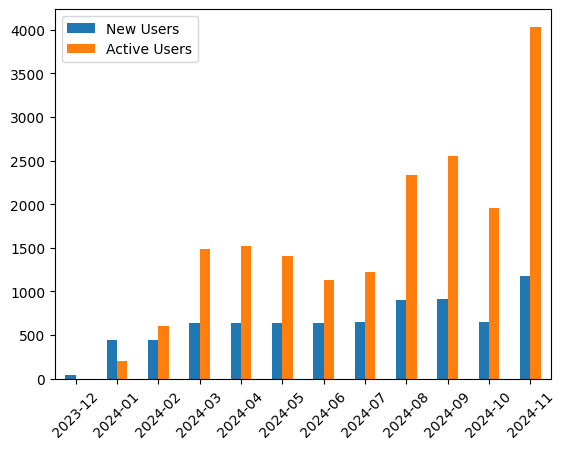

In [2]:
new_and_active_customers_df = new_and_active_customers_df.set_index("month")
ax = new_and_active_customers_df[["new_users_count", "active_users_count"]].plot(
    kind="bar", rot=45, xlabel="", legend=True
)
ax.legend(["New Users", "Active Users"]);

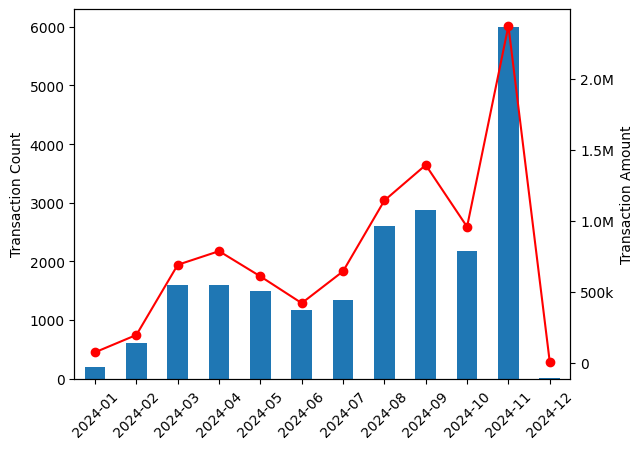

In [3]:
transactions_aggregated_index_df = transactions_aggregated_df.set_index("month")
ax = transactions_aggregated_index_df["transactions_count"].plot(
    kind="bar", rot=45, xlabel=""
)
ax2 = ax.twinx()
ax2.plot(
    transactions_aggregated_index_df.index,
    transactions_aggregated_index_df["sum_amount"],
    color="red",
    marker="o",
)
ax.set_ylabel("Transaction Count")
ax2.set_ylabel("Transaction Amount")
ax2.yaxis.set_major_formatter(FuncFormatter(smart_format))

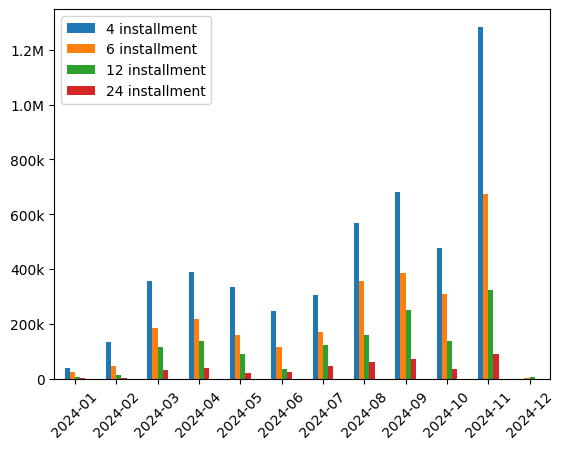

In [4]:
installment_plans_df = installment_plans_df.set_index("month")
ax = installment_plans_df[
    [
        "4_installment_transaction_volume",
        "6_installment_transaction_volume",
        "12_installment_transaction_volume",
        "24_installment_transaction_volume",
    ]
].plot(kind="bar", rot=45, xlabel="")
plt.legend(["4 installment", "6 installment", "12 installment", "24 installment"])
ax.yaxis.set_major_formatter(FuncFormatter(smart_format))

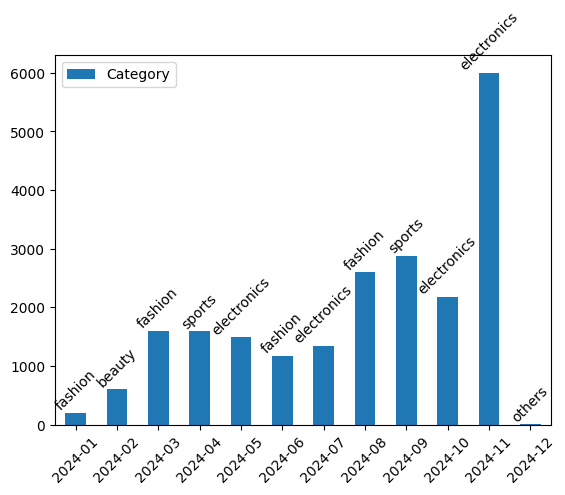

In [5]:
ax = popular_categories_df.set_index("month")[["category_transaction_count"]].plot(
    kind="bar"
)
ax.bar_label(
    ax.containers[0],
    labels=popular_categories_df.set_index("month")["category"],
    rotation=45,
)
plt.xticks(rotation=45)
plt.xlabel("")
plt.legend(["Category"]);
